# EDS Simulation

In [1]:
# This Example is building up a simple simulation

#if not installed
import os, sys
my_path = os.getcwd()+"/.."
sys.path.append(my_path)

# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

#import Ensembler
from ensembler.potentials import OneD as pot

##Imports:
import ensembler.visualisation.plotPotentials as exPlot


## The Reference Potential

### interactive example

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


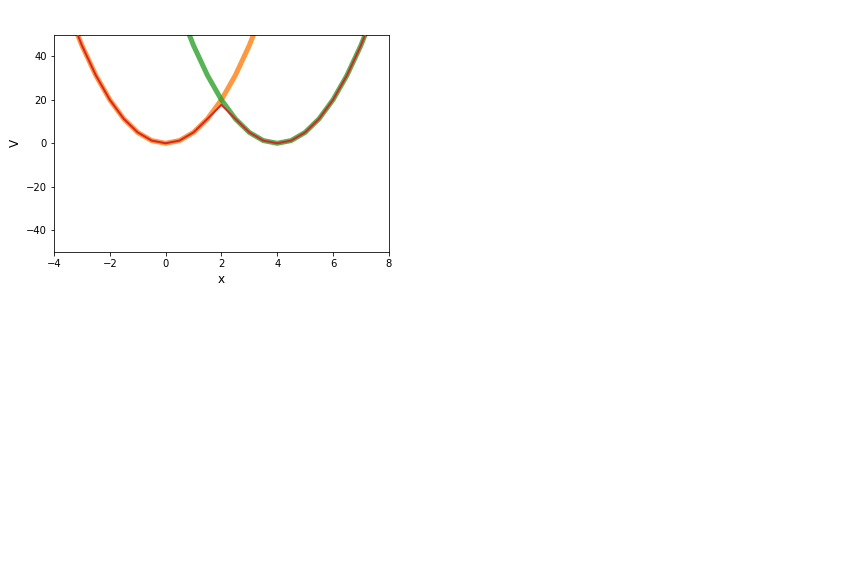

In [2]:
# This cell maybe needs multiple executions to work.
%pylab notebook
from ensembler.visualisation.interactive_plots import interactive_eds

app = interactive_eds()

### Building an EDS Potential

Populating the interactive namespace from numpy and matplotlib
harmonicOscillatorPotential
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*r**2 + 2.0*r + 2.0
		dVdpos:	1.0*r + 2.0

	Constants: 
		k: 			1.0
		r_0: 			-2
		Voffset: 			0.0
		nDimensionss: 			1
		nStates: 			1

 harmonicOscillatorPotential
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*r**2 - 2.0*r + 2.0
		dVdpos:	1.0*r - 2.0

	Constants: 
		k: 			1.0
		r_0: 			2
		Voffset: 			0.0
		nDimensionss: 			1
		nStates: 			1


envelopedPotential
	States: 2
	Dimensions: 1

	Functional:
 		V:	-T*kb*log(Sum(exp(-Matrix([
[s_0*(-Eoff_0 + state_0)],
[s_1*(-Eoff_1 + state_1)]])[i, 0]/(T*kb)), (i, 0, N - 1)))/s_i
		dVdpos:	0

	Simplified Function
		V:	-log(Sum(exp(-Matrix([
[0.5*r**2 + 2.0*r + 2.0],
[0.5*r**2 - 2.0*r + 2.0]])[i, 0]), (i, 0, 1)))/s_i
		dVdpos:	-Sum

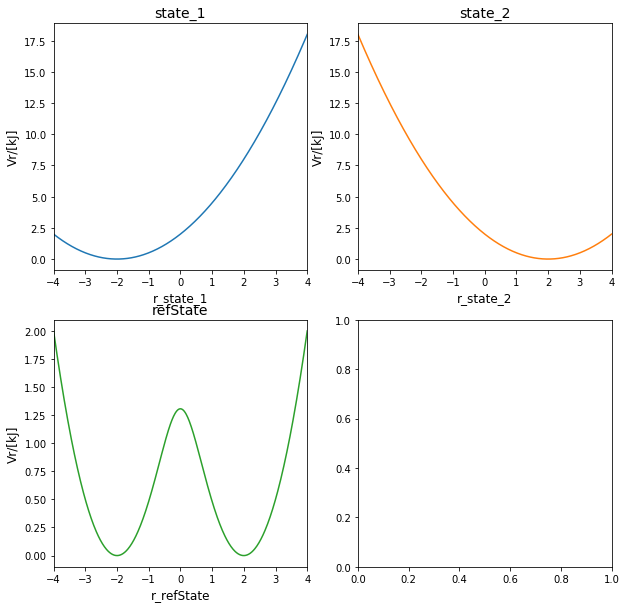

In [3]:
%pylab inline

test_timing_with_points=100
positions = np.linspace(-4,4, 500)

w1 = pot.harmonicOscillatorPotential(x_shift=-2)
w2 = pot.harmonicOscillatorPotential(x_shift=2)

print(w1, w2)
eds_V = pot.envelopedPotential(V_is=[w1,w2], eoff=[0,0])
print(eds_V)

print("calculate "+str(len(positions))+" positions: ")
%time eds_V.ene(positions)

#Visualization

exPlot.plot_envelopedPotential_system(eds_potential=eds_V,  positions=positions)
pass

#### What can the parameters for EDS DO?

##### Energy Offsets

In [4]:
##Construct potential
%pylab inline
s=1
Eoffs=(0, 0)
V_is=[pot.harmonicOscillatorPotential(x_shift=10, k=5), pot.harmonicOscillatorPotential(x_shift=-10, k=5)]
eds_V = pot.envelopedPotential(V_is=V_is, s=s, eoff=Eoffs)


##Parameters
svals= np.logspace(0, -3,num=13)
positions = np.linspace(-25,25, 500)

##Plot
exPlot.plot_potential(eds_pot,  positions=positions)


Populating the interactive namespace from numpy and matplotlib


NameError: name 'eds_pot' is not defined

##### Smoothing Parameter

In [ ]:
##Construct potential
%pylab inline
s=1
Eoffs=(0, 0)
V_is=[pot.harmonicOscillatorPotential(x_shift=10, k=5), pot.harmonicOscillatorPotential(x_shift=-10, k=5)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, eoff=Eoffs)


##Parameters
svals= np.logspace(0, -3,num=13)
positions = np.linspace(-25,25, 500)

##Plot
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions)


##### Many States

In [ ]:
### SuperMore complex example - 3 states  harmonicPot - 
# simple Example plot Enveloped Potential with two Harmonic Oscilators


##Construct potential
s1=1.0
s2=0.001
Eoffs=(0, 50, -50, 100, -100)


#V_is=[pot.harmonicOsc1D(x_shift=-10, fc=5), pot.harmonicOsc1D(x_shift=10, fc=5)]
k=20
V_is=[pot.harmonicOscillatorPotential(x_shift=-20, k=k), pot.harmonicOscillatorPotential(x_shift=20, k=k),
      pot.harmonicOscillatorPotential(x_shift=10, k=k), pot.harmonicOscillatorPotential(x_shift=-10, k=k), pot.harmonicOscillatorPotential(x_shift=0, k=k)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, eoff=Eoffs)

##Parameters
positions = np.linspace(-30,30,100)
svals=np.logspace(0, -3, 40)

exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-600,400), hide_legend=True)

Eoffs=(0, 0, 0, 0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s1, eoff=Eoffs)
exPlot.envPot_differentS_overlay_plot(eds_potential=eds_pot, s_values=svals, positions=positions, 
                                           y_range=(-600,400), hide_legend=True)